In [46]:
#Librerías necesarias

import snscrape.modules.twitter as sntwitter
import pandas as pd
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
#Directorio de trabajo
os.chdir('C:/Users/claud/Documents/')

In [48]:
#obtener tuits que contengan @claudiashein
tweets_list = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('@ticketmaster_me since:2022-01-01 until:2022-09-24').get_items()):
    if i>=100000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])



In [62]:
#crear dataframe
tweets_df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet_id', 'text', 'Username'])

In [63]:
#Dejar solo los tuits que contengan emojis
tweets_df = tweets_df[tweets_df['text'].str.contains(r'[\U0001F600-\U0001F64F]')]
tweets_df

,datetime,tweet_id,text,Username
25,2022-09-23 23:46:49+00:00,1573458896601088000,"@ErnestoTell @Ticketmaster_Me Si me estresa, t...",Eli_lindura_
26,2022-09-23 23:44:30+00:00,1573458315224285184,@valeefloresc @KevinoAmaro @DUALIPA @Ticketmas...,evy_eve_lyn
28,2022-09-23 23:42:13+00:00,1573457741166874624,@Ticketmaster_Me Osea que entonces los del cor...,ErnestoTell
39,2022-09-23 23:32:15+00:00,1573455230880169984,@erviticfm @Ticketmaster_Me Yo acabo de pasar ...,RolyG95
44,2022-09-23 23:27:29+00:00,1573454034417090577,@Alfredo_Pagaza @Ticketmaster_Me Ladrón que ro...,pacodlp7
...,...,...,...,...
99966,2022-02-15 16:12:14+00:00,1493619167286681600,😲 Hoy es el segundo y último día de #PreventaC...,Ticketmaster_Me
99987,2022-02-15 15:46:19+00:00,1493612647056560135,@alannavarro @TMetropolitanMx @Ticketmaster_Me...,NavarroHanyic
99989,2022-02-15 15:42:51+00:00,1493611772766572555,@alannavarro @TMetropolitanMx @Ticketmaster_Me...,iH0N3YALEX
99990,2022-02-15 15:42:13+00:00,1493611613655642112,@alannavarro @TMetropolitanMx @Ticketmaster_Me...,iH0N3YALEX


In [64]:
#Imprimir fecha máxima y mínima
print(tweets_df['datetime'].max())
print(tweets_df['datetime'].min())

2022-09-23 23:46:49+00:00
2022-02-15 15:39:20+00:00


In [65]:
#Dejar solo los emojis
tweets_df['text'] = tweets_df['text'].str.findall(r'[\U0001F600-\U0001F64F]').str.join(' ')
tweets_df

,datetime,tweet_id,text,Username
25,2022-09-23 23:46:49+00:00,1573458896601088000,🙈 😵 😭,Eli_lindura_
26,2022-09-23 23:44:30+00:00,1573458315224285184,😅,evy_eve_lyn
28,2022-09-23 23:42:13+00:00,1573457741166874624,🙄,ErnestoTell
39,2022-09-23 23:32:15+00:00,1573455230880169984,😎,RolyG95
44,2022-09-23 23:27:29+00:00,1573454034417090577,😂 😉,pacodlp7
...,...,...,...,...
99966,2022-02-15 16:12:14+00:00,1493619167286681600,😲,Ticketmaster_Me
99987,2022-02-15 15:46:19+00:00,1493612647056560135,😍,NavarroHanyic
99989,2022-02-15 15:42:51+00:00,1493611772766572555,😰,iH0N3YALEX
99990,2022-02-15 15:42:13+00:00,1493611613655642112,😋,iH0N3YALEX


In [66]:
#Hacer dataframe de emojis
tweets_df = tweets_df['text'].str.get_dummies(sep=' ')
tweets_df
#Contar frecuencia de emojis y ordenar en dataframe
tweets_df = tweets_df.sum().sort_values(ascending=True, inplace=False).to_frame()
tweets_df

,0
🙍,1
😼,1
😽,1
😺,3
🙅,3
...,...
😂,499
🙏,603
🙄,640
😡,1263


C:\Users\claud\AppData\Local\Temp\ipykernel_28364\2304503886.py:29: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig('ticketmaster.png', bbox_inches='tight')
C:\Users\claud\AppData\Local\Temp\ipykernel_28364\2304503886.py:29: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig('ticketmaster.png', bbox_inches='tight')


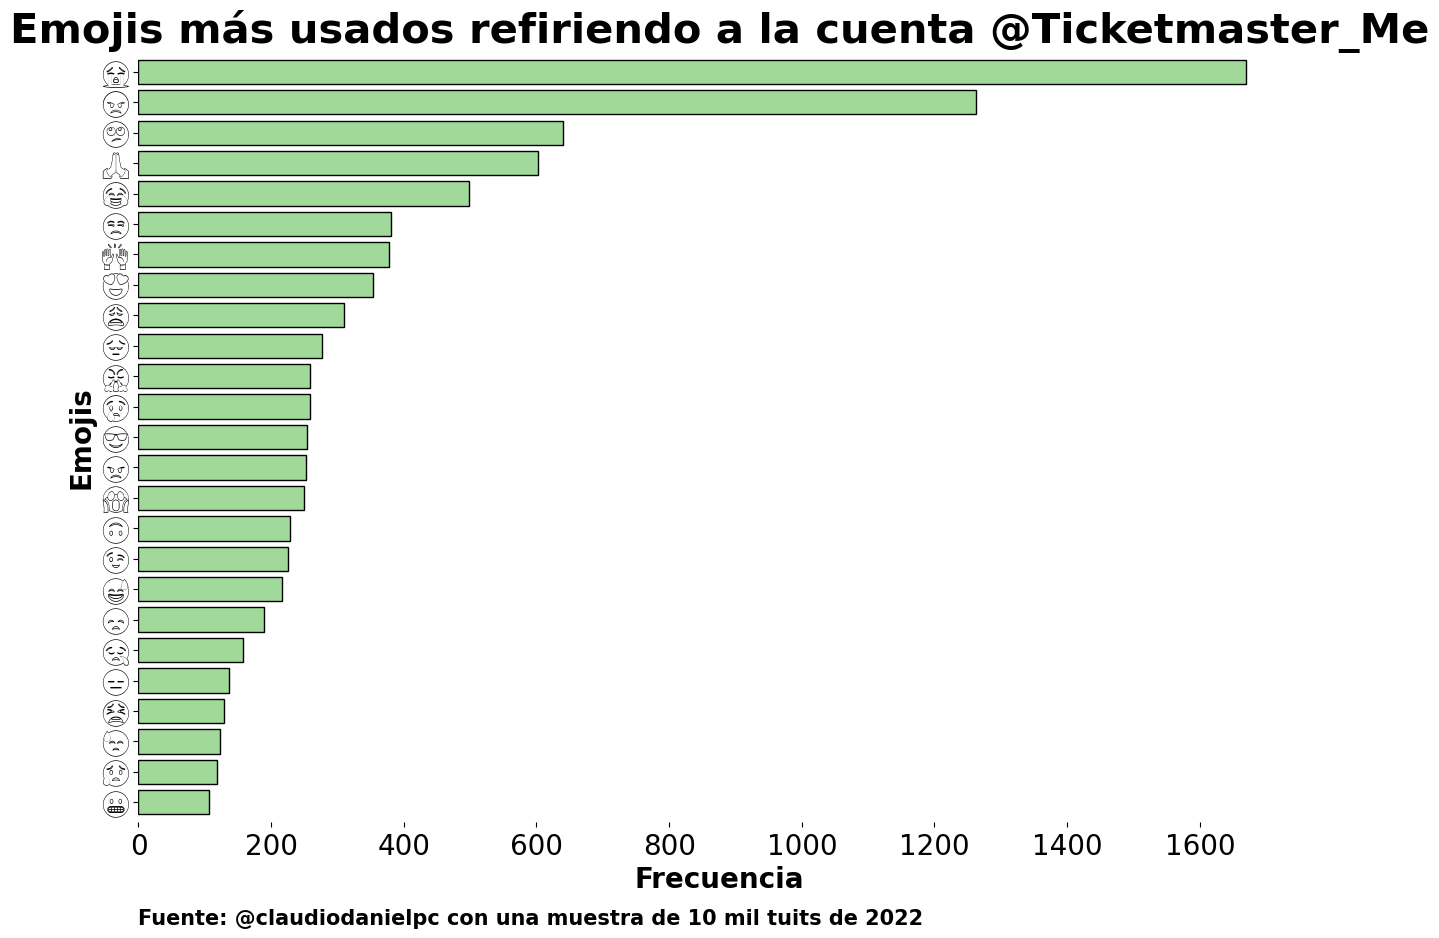

In [74]:
#Hacer gráfico de emojis
import matplotlib.font_manager as fm

#Cargar archivo ttf de fuentes
font_path = 'C:/Users/claud/AppData/Local/Microsoft/Windows/Fonts/TwitterColorEmoji-SVGinOT.ttf'
prop = fm.FontProperties(fname=font_path)


#Filtrar los 10 emojis más usados
filtro = tweets_df.iloc[-25:]

#Crear gráfico de barras horizontal 
filtro.plot(kind='barh', figsize=(15,10), legend=False,
 color='#a1d99b', fontsize=20, width=0.8, edgecolor='black')
plt.title('Emojis más usados refiriendo a la cuenta @Ticketmaster_Me', fontsize=30, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=20, fontweight='bold')
plt.ylabel('Emojis', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20, fontproperties=prop)
#Eliminar marcos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
#Fuente del gráfico
plt.text(0, -4, 'Fuente: @claudiodanielpc con una muestra de 10 mil tuits de 2022', fontsize=15, fontweight='bold')

#Guardar gráfico
plt.savefig('ticketmaster.png', bbox_inches='tight')
plt.show()